Import the packages

In [4]:
# general
import numpy as np
import pandas as pd
# sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# graphs
import seaborn as sns
import matplotlib.pyplot as plt
# import and export model
import joblib as jb

Import the dataset

In [5]:
heart_dataset=pd.read_csv('heart.csv')

Analyze the dataset

In [21]:
print('size of data : ',heart_dataset.shape)

size of data :  (1025, 14)


In [20]:
print('info about columns : ',heart_dataset.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
info about columns :  None


In [19]:
print('describe the data : ',heart_dataset.describe())

describe the data :                 age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.

In [18]:
print('first five rows of data : ',heart_dataset.head())


first five rows of data :     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [22]:
print('last five rows of data : ',heart_dataset.tail())

last five rows of data :        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [28]:
print(heart_dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [26]:
# check if data is balance
print(heart_dataset['target'].value_counts())

1    526
0    499
Name: target, dtype: int64


Visiualize the data

<AxesSubplot:>

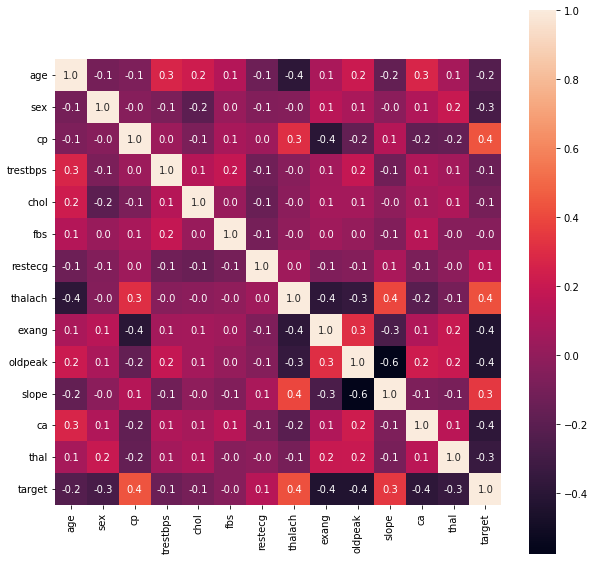

In [38]:
# print the correlations
correlations=heart_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
  correlations,
  square=True,
  annot=True,
  fmt='.1f'
)


<AxesSubplot:xlabel='target', ylabel='age'>

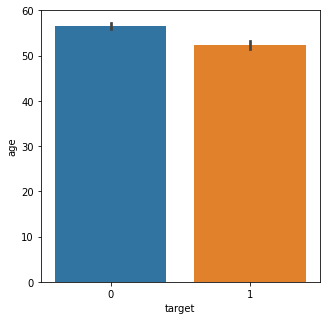

In [43]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='target', y = 'age', data = heart_dataset, )

In [47]:
X=heart_dataset.drop(['target'],axis=1)
Y=heart_dataset['target']

Spliting the data

In [48]:
print(X.head())
print(Y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [63]:
print(X.shape, X_train.shape, X_test.shape)


(1025, 13) (820, 13) (205, 13)


Train the logistic regression model

In [64]:
model = LogisticRegression()

In [65]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\Sohail\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model evaluation

In [66]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [67]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [70]:
# accuracy on testinging data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [71]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8048780487804879


Building a Predictive System

In [73]:
# Heathy heart => 54,1,0,122,286,0,0,116,1,3.2,1,2,2
# Diseased heart => 71,0,0,112,149,0,1,125,0,1.6,1,0,2

input_data = (54,1,0,122,286,0,0,116,1,3.2,1,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\Sohail\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [74]:
jb.dump(model,'heartDiseasePrediction.joblib')

['heartDiseasePrediction.joblib']